In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("mcdonalds.csv")
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


## Exploring The Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
#Extracting the segmentation variables

segmentation_vars = data.iloc[:,:11]
segmentation_vars

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [5]:
#Converting 'YES' to 1, otherwise 0
mat_seg_vars = np.where(segmentation_vars=="Yes",1,0)

In [6]:
column_means = mat_seg_vars.mean(axis=0).round(2)

In [7]:
#printing Average Values of transformed binary numeric segmentation variables
for i,j in zip(segmentation_vars.columns,column_means):
    print(f"{j*100}% people think McDonald's food is {i.upper()}")

55.00000000000001% people think McDonald's food is YUMMY
91.0% people think McDonald's food is CONVENIENT
9.0% people think McDonald's food is SPICY
87.0% people think McDonald's food is FATTENING
53.0% people think McDonald's food is GREASY
90.0% people think McDonald's food is FAST
60.0% people think McDonald's food is CHEAP
64.0% people think McDonald's food is TASTY
36.0% people think McDonald's food is EXPENSIVE
20.0% people think McDonald's food is HEALTHY
24.0% people think McDonald's food is DISGUSTING


### Principal Component Analysis

In [8]:
#Using PCA to analyse perceptual map
from sklearn.decomposition import PCA
pca = PCA()
transformed = pca.fit_transform(mat_seg_vars)

In [9]:
transformed_df = pd.DataFrame(transformed,columns=[f"PC{(i+1)}" for i in range(11)])
transformed_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [10]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

In [11]:
#View the Summary for Principal Components
summary = pd.DataFrame(index=transformed_df.columns)
summary['standard_deviation'] = np.sqrt(pca.explained_variance_)
summary['explained_variance_ratio'] = explained_variance
summary['cum_explained_variance_ratio'] = cumulative_explained_variance

In [12]:
summary

,standard_deviation,explained_variance_ratio,cum_explained_variance_ratio
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


* First two principal components are able to capture around 50% of the information

In [13]:
#Understanding the contribution of each original feature in each of the Principal Component
pd.DataFrame(-pca.components_, index=transformed_df.columns, columns=segmentation_vars.columns).T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.476933,-0.363790,0.304444,-0.055162,0.307535,-0.170738,0.280519,-0.013041,-0.572403,0.110284,-0.045439
convenient,0.155332,-0.016414,0.062515,0.142425,-0.277608,0.347830,0.059738,0.113079,0.018465,0.665818,0.541616
spicy,0.006356,-0.018809,0.037019,-0.197619,-0.070620,0.355087,-0.707637,-0.375934,-0.400280,0.075634,-0.141730
fattening,-0.116232,0.034094,0.322359,0.354139,0.073405,0.406515,0.385943,-0.589622,0.160512,0.005338,-0.250910
greasy,-0.304443,0.063839,0.802373,-0.253960,-0.361399,-0.209347,-0.036170,0.138241,0.002847,-0.008707,-0.001642
fast,0.108493,0.086972,0.064642,0.097363,-0.107930,0.594632,0.086846,0.627799,-0.166197,-0.239532,-0.339265
cheap,0.337186,0.610633,0.149310,-0.118958,0.128973,0.103241,0.040449,-0.140060,-0.076069,-0.428087,0.489283
tasty,0.471514,-0.307318,0.287265,0.002547,0.210899,0.076914,-0.360453,0.072792,0.639086,-0.079184,-0.019552
expensive,-0.329042,-0.601286,-0.024397,-0.067816,0.003125,0.261342,0.068385,-0.029539,-0.066996,-0.454399,0.490069
healthy,0.213711,-0.076593,-0.192051,-0.763488,-0.287846,0.178226,0.349616,-0.176303,0.185572,0.038117,-0.157608


* From the above Dataframe we can understand the loading of each original feature on each principal component, giving us insights as to which feature contributes more to what PC.
* With this we can, roughly, see what a particular Principal Component is talking about.

##### Perceptual Map for the Principal Components Extracted

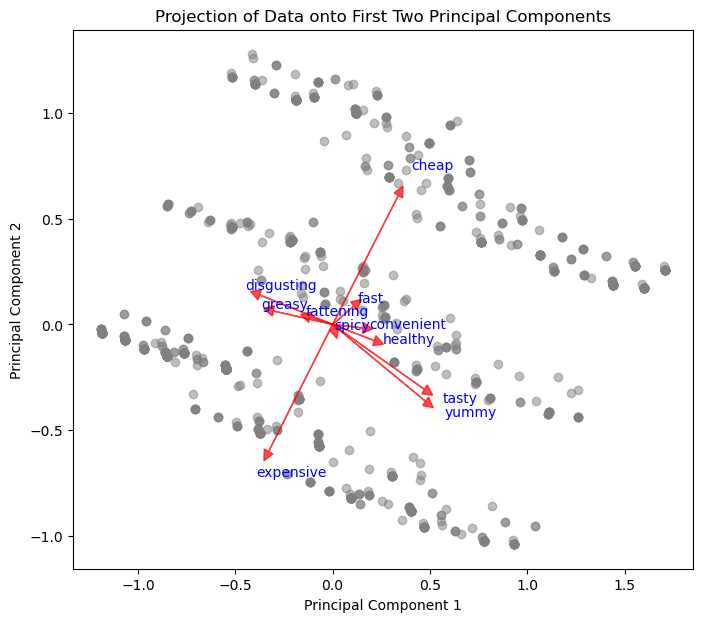

In [14]:
#scatter plot of the original data points wrt the first two Principal Components
plt.figure(figsize=(8,7))
plt.scatter(transformed[:,0], transformed[:,1], color='grey', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Projection of Data onto First Two Principal Components")

#plotting the original attributes
for i, feature in enumerate(segmentation_vars.columns):
    plt.arrow(0,0, -pca.components_[0,i], -pca.components_[1,i], color='red', alpha=0.7, head_width=0.05, head_length=0.05)
    plt.text(-pca.components_[0,i]*1.2, -pca.components_[1,i]*1.2, feature, color='blue')

* "cheap" and "expensive" will be crucial in the evaluation, and these attributes stand out differently and independtently from others. 
* As for other attributes, those can be understood in terms of Positive and Negative Perceptions. fattening, disgusting and greasy points in the same direction. In the opposite direction are the attributes such as "yummy", "tasty", "fast", "healthy", "convenient".
* The attribute "spicy" depends on each consumer. For some it is a positive thing to have for others it could be negative. Hence, we can see that it is constricted in a very small range and can't add much for clustering.
* Whereas, if we look at "cheap"-"expensive" axis, we can have around three clusters. One surrounding the tip of "cheap", another surrounding to that of "expensive" and those points lying in the middle of these two extremes.


## Extracting Segments

### 1) Using KMeans

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
# calculate solutions for two to eight market segments using k-means analysis with ten random restarts

np.random.seed(45)

def kmeans_clustering(data, k_range, n_repetitions):
    best_k = None
    best_model = None
    best_score = -1
    all_scores = []
    all_wcss = []
    
    for k in k_range:
        for _ in range(n_repetitions):
            model = KMeans(n_clusters=k, random_state=np.random.randint(0,20000))
            cluster_labels = model.fit_predict(data)
            score = silhouette_score(data, cluster_labels)
            
            if score > best_score:
                best_score = score
                best_k = k
                best_model = model
        all_scores.append(best_score)
        all_wcss.append(best_model.inertia_)
                
    print(f"best_model:{best_model}, best_k:{best_k}, best_score:{best_score}")            
    return best_model, best_k, all_scores, all_wcss

best_model, best_k, all_scores, all_wcss = kmeans_clustering(mat_seg_vars, range(2,9), 10)

best_model:KMeans(random_state=19964), best_k:8, best_score:0.2898738491037123


In [17]:
#Relabelling the clusters
def relabel_clusters(model, data):
    cluster_labels = model.predict(data)
    
    #unique clusters
    unique_labels = np.unique(cluster_labels)
    label_mapping = {old_label:new_label for new_label, old_label in enumerate(unique_labels)}
    #assigning new labels
    relabeled_clusters = np.vectorize(label_mapping.get)(cluster_labels)
    
    return relabeled_clusters

relabeled_clusters = relabel_clusters(best_model,mat_seg_vars)

print(f'Best number of clusters:{best_k}')
print('Cluster labels after relabeling:', relabeled_clusters)

Best number of clusters:8
Cluster labels after relabeling: [6 1 5 ... 5 0 4]


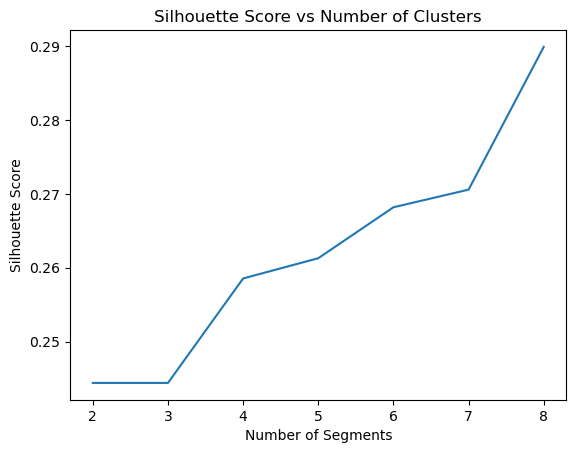

In [18]:
plt.plot(range(2,9), all_scores)
plt.xlabel('Number of Segments')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

##### 1.1. Scree Plot to decide the number of clusters to be formed

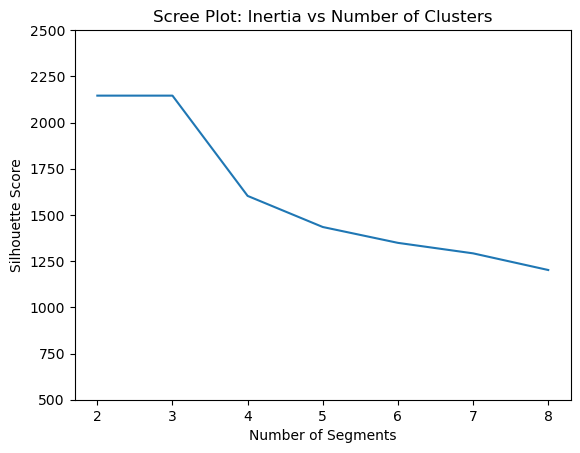

In [19]:
plt.plot(range(2,9),all_wcss)
plt.ylim(500,2500)
plt.xlabel("Number of Segments")
plt.ylabel('Silhouette Score')
plt.title('Scree Plot: Inertia vs Number of Clusters')
plt.show()

* This curve doesn't show any significant "elbow point" from where we could decide on the number of clusters. Hence will try with an alternative technique.

##### 1.2. Stability-based Data Structure Analysis

In [20]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

##### Plot for Global Stability

In [21]:
#. Assessing the stability of segmentation solutions across repeated calculations ensures that unstable, random solutions are not used.

np.random.seed(45)

def calculate_stability(data, n_clusters, n_repititions=10, n_bootstrap=100):
    stability_scores = []
    
    for n in n_clusters:
        boot_scores = []
        
        #bootstrapping samples
        for _ in range(n_bootstrap):
            X_boot = resample(data, replace=True, n_samples=len(data), random_state=np.random.randint(0,100000))
            
            labels_list = []

            #applying KMeans for multiple iterations
            for _ in range(n_repititions):
                kmeans = KMeans(n_clusters=n, random_state=np.random.randint(0,100000))
                kmeans.fit(X_boot)
                labels_list.append(kmeans.labels_)
                
            #compute pairwise Adjusted Rand Index
            for i in range(len(labels_list)):
                for j in range(len(labels_list)):
                    ari = adjusted_rand_score(labels_list[i],labels_list[j])
                    boot_scores.append(ari)
                    
        stability_scores.append(boot_scores)

    return stability_scores

stability_scores = calculate_stability(mat_seg_vars,range(2,9))
#print(stability_scores)

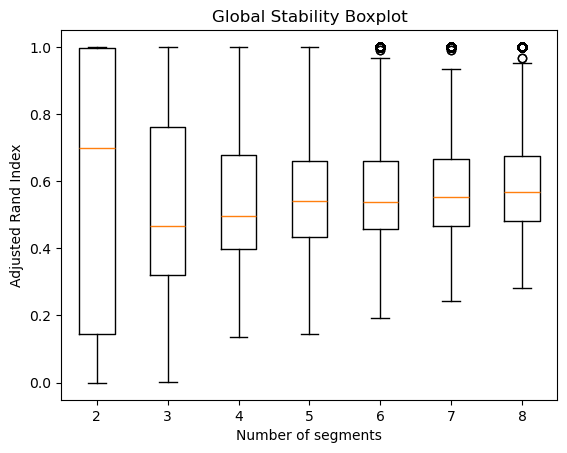

In [22]:
#plot for Global Stability scores
plt.boxplot(stability_scores, labels=range(2,9))
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability Boxplot")
plt.show()

**>>>Analysing the boxplot for Global Stability**

* Higher Median ARI - A higher median ARI for a specific number of clusters indicates that the clustering results are more stable across different bootstrap samples. This means that the chosen number of clusters tends to produce consistent and reliable results.

* Smaller IQR - A smaller IQR suggests less variability in the stability scores, indicating that the clustering results are more consistent across different initializations and bootstrap samples.

* Lower Range of Whiskers - Whiskers that do not extend far from the box indicate that most of the ARI values are close to the median, suggesting that the clustering is stable across different initializations and bootstrap samples.

* Fewer Outliers - Fewer outliers indicate that most of the clustering results are similar, reinforcing the idea of stability.

##### Gorge Plots

In [23]:
from sklearn.metrics import pairwise_distances

In [24]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(mat_seg_vars)
labels = kmeans.labels_
#centroids = kmeans.cluster_centers_
#centroids[labels]

In [25]:
# Calculate pairwise similarities within each cluster
def calculate_similarity(X, labels, n_clusters):
    sim = []

    for i in range(n_clusters):
        cluster_indices = np.where(labels == i)[0]  
        cluster_data = X[cluster_indices] #seperating respective cluster points
        
        if len(cluster_data) > 1:
            distances = pairwise_distances(cluster_data)
            max_distance = distances.max()
            
            if max_distance > 0:
                sim.extend((1 - (distances / max_distance)).flatten())
    
    # Flatten the list and remove self-similarity values (diagonal)
    sim = np.array(sim)
    similarities = sim[sim < 1]
    #print(similarities)

    return similarities

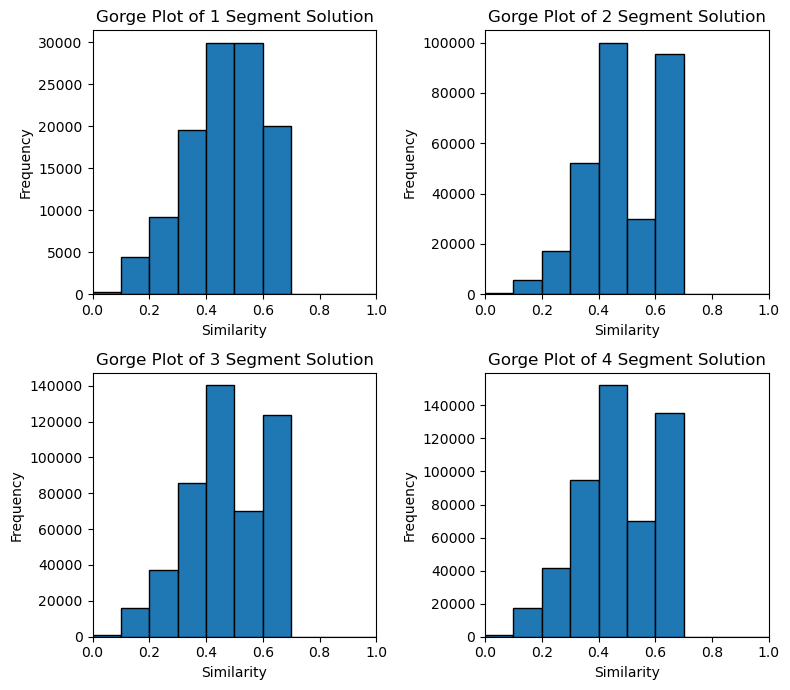

In [26]:
plt.figure(figsize=(8,7))
ax=1
for _ in range(1,5):
    plt.subplot(2,2,ax)
    plt.hist(calculate_similarity(mat_seg_vars, labels, int(f"{ax}")), bins=10, range=(0, 1), edgecolor='black')
    plt.xlabel('Similarity')
    plt.ylabel('Frequency')
    plt.title(f'Gorge Plot of {ax} Segment Solution')
    plt.xlim(0, 1)
    ax+=1

plt.tight_layout()
plt.show()

##### Cluster Visualization using PCA

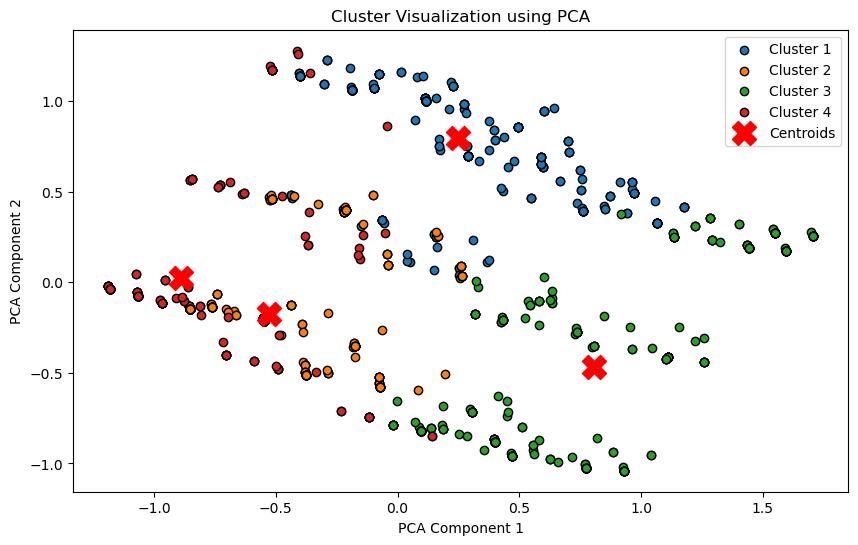

In [27]:
# Reduce dimensionality to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(mat_seg_vars)

# Plot the clusters
plt.figure(figsize=(10, 6))

# Plot each cluster
for cluster in np.unique(labels):
    plt.scatter(X_pca[labels == cluster, 0], X_pca[labels == cluster, 1], label=f'Cluster {cluster + 1}', edgecolor='black')

# Plot the cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=300, c='red', marker='X', label='Centroids')

# Labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization using PCA')
plt.legend()
plt.show()

##### Segment Level Stability Within solutions (SLSW)

In [28]:
# Function to calculate segment level stability within solutions(SLSW)
from sklearn.metrics import silhouette_samples
def calculate_slsw(data, labels, n_clusters):
    segment_stabilities = []
    
    for cluster in range(n_clusters):
        cluster_data = data[labels == cluster]
        
        if len(cluster_data) > 1:
            silhouette_vals = silhouette_samples(data, labels)
            stability = np.mean(silhouette_vals[labels == cluster])
            
        else:
            stability = 1.0  # Assign a perfect stability if only one element in the cluster
            
        segment_stabilities.append(stability)
        
    return segment_stabilities

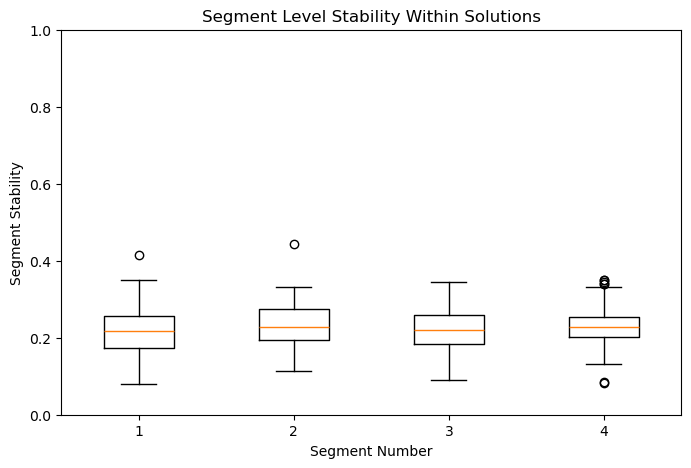

In [29]:
n_iterations = 100  # Number of iterations to calculate stability

# Collect stability values over multiple iterations
slsw_values_all = []

for i in range(n_iterations):
    kmeans = KMeans(n_clusters=4, random_state=np.random.randint(1,5000))
    kmeans.fit(mat_seg_vars)
    labels = kmeans.labels_
    
    slsw_values = calculate_slsw(mat_seg_vars, labels, 4)
    slsw_values_all.append(slsw_values)

# Convert to numpy array for easier indexing
slsw_values_all = np.array(slsw_values_all)

# Create a boxplot for the stability values of each segment
plt.figure(figsize=(8,5))
plt.boxplot(slsw_values_all, positions=np.arange(1,5))
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment Level Stability Within Solutions")
plt.show()

##### 1.3 Using Mixtures of Distributions

In [30]:
from sklearn.mixture import GaussianMixture

n_clusters_range = range(2, 9)
n_replications = 10

results = []

def calculate_icl(model, X):
    n_samples, _ = X.shape
    log_likelihood = model.score(X) * n_samples
    bic = model.bic(X)
    probabilities = model.predict_proba(X)
    entropy = -np.sum(probabilities * np.log(probabilities + 1e-10))/n_samples
    icl = bic + entropy
    return icl

for k in n_clusters_range:
    best_model = None
    best_log_likelihood = -np.inf
    
    for _ in range(n_replications):
        # Perform clustering
        model = GaussianMixture(n_components=k, random_state=np.random.randint(10000))
        model.fit(mat_seg_vars)
        
        log_likelihood = model.score(mat_seg_vars)
        
        if log_likelihood > best_log_likelihood:
            best_log_likelihood = log_likelihood
            best_model = model
    
    # Calculate AIC and BIC
    aic = best_model.aic(mat_seg_vars)
    bic = best_model.bic(mat_seg_vars)
    icl = calculate_icl(best_model, mat_seg_vars)
    
    results.append({
        'k': k,
        'logLik': best_log_likelihood * mat_seg_vars.shape[0],
        'AIC': aic,
        'BIC': bic,
        'ICL': icl
    })

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)
results_df

,k,logLik,AIC,BIC,ICL
0,2,11147.820925,-21985.641850,-21167.027072,-21167.027072
1,3,13793.434043,-27120.868086,-25890.305226,-25890.305226
2,4,19998.024737,-39374.049473,-37731.538532,-37731.538532
3,5,21729.154435,-42680.308870,-40625.849847,-40625.849706
4,6,24527.680017,-48121.360034,-45654.952930,-45654.952211
5,7,24587.995253,-48085.990506,-45207.635320,-45207.635190
6,8,27835.982686,-54425.965372,-51135.662104,-51135.661988


##### Information Criteria for the mixture models

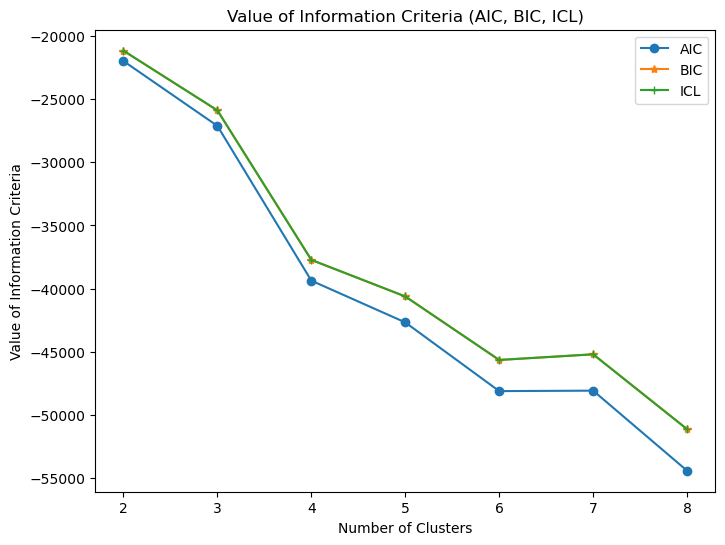

In [31]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(results_df['k'], results_df['AIC'], label='AIC', marker='o')
plt.plot(results_df['k'], results_df['BIC'], label='BIC', marker='*')
plt.plot(results_df['k'], results_df['ICL'], label='ICL', marker='+')

plt.xlabel('Number of Clusters')
plt.ylabel('Value of Information Criteria')
plt.title('Value of Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.show()

In [32]:
# Number of clusters
n_clusters_kmeans = 4
n_clusters_gmm = 4

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42)
kmeans_labels = kmeans.fit_predict(mat_seg_vars)

# Perform GMM clustering
gmm = GaussianMixture(n_components=n_clusters_gmm, random_state=42)
gmm_labels = gmm.fit_predict(mat_seg_vars)

# Create a contingency table
contingency_table = pd.crosstab(kmeans_labels, gmm_labels, rownames=['KMeans'], colnames=['GMM'])

contingency_table

GMM,0,1,2,3
KMeans,,,,
0,88,0,0,8
1,37,496,61,0
2,22,0,296,6
3,5,0,296,138


##### 1.4 Using Mixtures of Regression Models- Latent Class Regression

In [33]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [34]:
data['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [35]:
# Map 'Like' values to numeric values
like_mapping = {
    'I hate it!-5': -5,
    '-5': -5,
    '-4': -3,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

data['Like_n'] = data['Like'].map(like_mapping)
data['Like_n'] = 6 - data['Like_n'] 

data['Like_n'].value_counts()

Like_n
3     229
4     187
6     169
2     160
5     152
11    152
9     144
1     143
8      59
7      58
Name: count, dtype: int64

In [36]:
# Map 'Like' values to numeric values
like_mapping = {
    'I hate it!-5': -5,
    '-5': -5,
    '-4': -3,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

data['Like_n'] = data['Like'].map(like_mapping)
data['Like_n'] = 6 - data['Like_n'] 

data['Like_n'].value_counts()

Like_n
3     229
4     187
6     169
2     160
5     152
11    152
9     144
1     143
8      59
7      58
Name: count, dtype: int64

In [37]:
data1 = pd.concat([segmentation_vars, data['Like_n']], axis=1)

In [38]:
data2 = data1

In [39]:
import statsmodels.api as sm
# Constructing the formula string
formula_cols = pd.DataFrame(data1[:5])  # Selecting first 4 columns as in the R example
formula_str = "Like_n ~" + " + ".join(formula_cols)

# Creating a formula object
formula = sm.formula.ols(formula_str, data=data1)

# Print the formula object
print(formula)

model = formula.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Like_n   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.905e+31
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:53:01   Log-Likelihood:                 45167.
No. Observations:                1453   AIC:                        -9.031e+04
Df Residuals:                    1440   BIC:                        -9.024e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -8.438e-15    1.4e-15     -6.006      0.000   -1.12e-14   -5.68e-15
yummy[T.Yes]       6.816e-15   6.23e-16     10.932      0.000    5.59e-15    8.04e-15
convenient[T.Yes]   2.22e-16   7.83e-16      0.284      0.777   -1.31e-15    1.76e-15
spicy[T.Yes]      -3.331e-16   7.04e-16     -0.473      0.636   -1.71e-15    1.05e-15
fattening[T.Yes]   3.525e-15   6.65e-16      5.299      0.000    2.22e-15    4.83e-15
greasy[T.Yes]      1.298e-15   4.51e-16      2.879      0.004    4.13e-16    2.18e-15
fast[T.Yes]        1.277e-15   7.16e-16      1.784      0.075   -1.27e-16    2.68e-15
cheap[T.Yes]       3.331e-15   6.13e-16      5.436      0.000    2.13e-15    4.53e-15
tasty[T.Yes]      -2.671e-15   6.21e-16     -4.301      0.000   -3.89e-15   -1.45e-15
expensive[T.Yes]   4.968e-15   6.27e-16      7.929      0.000    3.74e-15     6.2e-15
healthy[T.Yes]    -9.298e-16   5.65e-16     -1.645      0.100   -2.04e-15    1.79e-16
disgusting[T.Yes]  -1.11e-15   6.09e-16     -1.823      0.069   -2.31e-15    8.47e-17
Like_n                1.0000   1.08e-16   9.29e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       31.481   Durbin-Watson:                   0.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.880
Skew:                           0.268   Prob(JB):                     2.19e-09
Kurtosis:                       3.609   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Profiling Segements

In [40]:
data1 = data1.drop(columns=['Like_n'])

In [41]:
data1_mat = np.where(data1=='Yes',1, np.where(data1=='No', 0, data1))

In [42]:
data1_df = pd.DataFrame(data1_mat, columns=data1.columns)
data1_df.head(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0


In [43]:
kmeans = KMeans(n_clusters=4, random_state=1234)
segments = kmeans.fit_predict(data1_df)

# Calculate mean values for each segment
data1_df['segment'] = segments
segment_means = data1_df.groupby('segment').mean()

data1_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,segment
0,0,1,0,1,0,1,1,0,1,0,0,2
1,1,1,0,1,1,1,1,1,1,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,3
3,1,1,0,1,1,1,1,1,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,1
1449,1,1,0,1,0,0,1,1,0,1,0,0
1450,1,1,0,1,0,1,0,1,1,0,0,3
1451,1,1,0,0,0,1,1,1,0,1,0,0


##### Segment Profile Plot

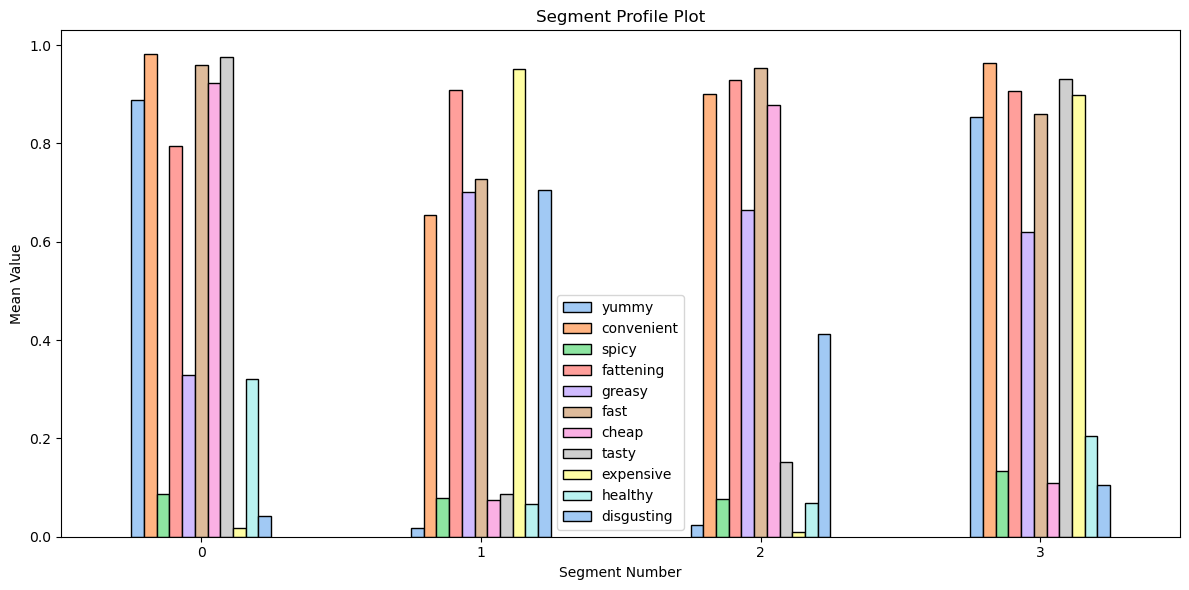

In [44]:
# Plotting bar chart with shaded bars
fig, ax = plt.subplots(figsize=(12, 6))
colors = sns.color_palette("pastel", len(data1.columns))
bars = segment_means.plot(kind='bar', ax=ax, color=colors, edgecolor='black')

plt.xlabel('Segment Number')
plt.ylabel('Mean Value')
plt.title('Segment Profile Plot')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Segment Seperation Plot

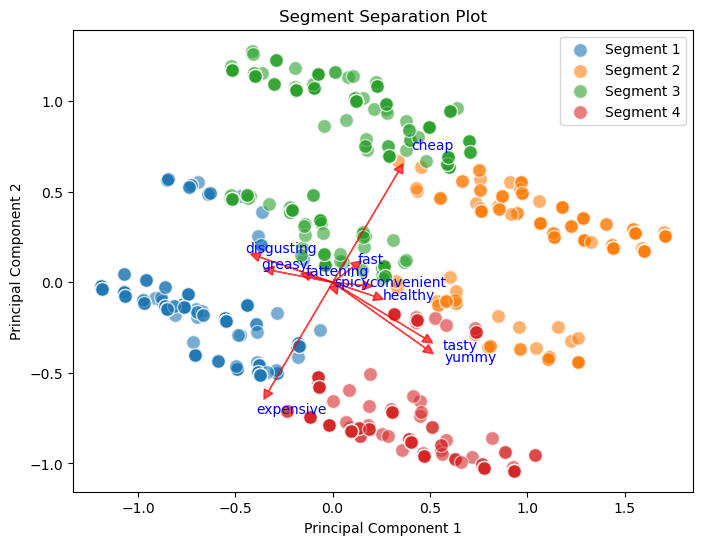

In [45]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(mat_seg_vars)

kmeans = KMeans(n_clusters=4, random_state=45)
segments = kmeans.fit_predict(mat_seg_vars)

plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b', 'c']
for segment in np.unique(segments):
    plt.scatter(principal_components[segments == segment, 0],
                principal_components[segments == segment, 1],
                label=f'Segment {segment + 1}',
                alpha=0.6,
                edgecolors='w',
                s=100)

for i, feature in enumerate(segmentation_vars.columns):
    plt.arrow(0,0, -pca.components_[0,i], -pca.components_[1,i], color='red', alpha=0.7, head_width=0.05, head_length=0.05)
    plt.text(-pca.components_[0,i]*1.2, -pca.components_[1,i]*1.2, feature, color='blue')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment Separation Plot')
plt.legend()
plt.show()

##### Mosaic Plot for cross-tabulation

In [46]:
data2['Like_n']

0        9
1        4
2        5
3        2
4        4
        ..
1448    11
1449     4
1450     3
1451     2
1452     9
Name: Like_n, Length: 1453, dtype: int64

In [47]:
data1_df.head(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,segment
0,0,1,0,1,0,1,1,0,1,0,0,2
1,1,1,0,1,1,1,1,1,1,0,0,3


In [48]:
data['Like']

0                 -3
1                 +2
2                 +1
3                 +4
4                 +2
            ...     
1448    I hate it!-5
1449              +2
1450              +3
1451              +4
1452              -3
Name: Like, Length: 1453, dtype: object

In [49]:
contingency_table = pd.crosstab(data1_df['segment'], data2['Like_n'])
contingency_table

Like_n,1,2,3,4,5,6,7,8,9,11
segment,,,,,,,,,,
0,99,111,143,90,65,43,13,6,6,4
1,0,0,9,5,13,35,11,16,55,84
2,0,2,11,32,32,55,27,31,73,59
3,44,47,66,60,42,36,7,6,10,5


In [50]:
# Map 'Like' values to numeric values
like_mapping = {
    'I hate it!-5': -5,
    '-5': -5,
    '-4': -3,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

data['Like_n'] = data['Like'].map(like_mapping)
data['Like_n'] = 6 - data['Like_n'] 

data['Like_n'].value_counts()

Like_n
3     229
4     187
6     169
2     160
5     152
11    152
9     144
1     143
8      59
7      58
Name: count, dtype: int64

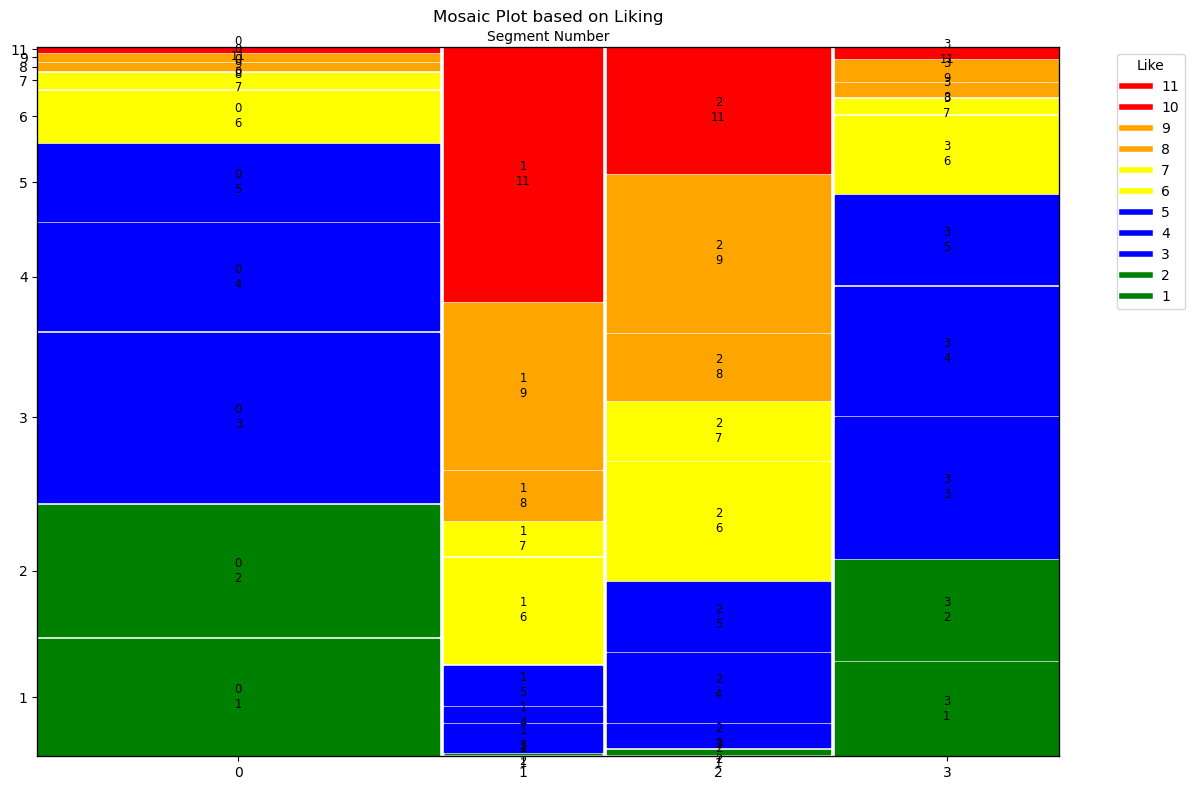

In [52]:
from statsmodels.graphics.mosaicplot import mosaic
color_palette = {
    "11": "red",
    "10": "red",
    "9": "orange",
    "8": "orange",
    "7": "yellow",
    "6": "yellow",
    "5": "blue",
    "4": "blue",
    "3": "blue",
    "2": "green",
    "1": "green"
}

#props = lambda key: {'color': 'skyblue' if 'I' in key[0] else 'yellow'}

def props(key):
    like_value = key[1]
    return {'color': color_palette[like_value]}
    
fig, ax = plt.subplots(figsize=(12, 8))
mosaic(contingency_table.stack(), title='Mosaic Plot based on Liking', properties=props, ax=ax)

# Step 5: Add legend
handles = [plt.Line2D([0], [0], color=color_palette[like], lw=4) for like in color_palette]
labels = list(color_palette.keys())
ax.legend(handles, labels, title='Like', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Segment Number")
plt.ylabel("Ratings - Like")
plt.tight_layout()
plt.show()